In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.preprocessing import preprocess

In [2]:
X_train, X_test, y_train, y_test, transformers = preprocess()

Complete!: 100%|██████████| 5/5 [00:07<00:00,  1.51s/it]                


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


mixture_preprocess = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))

mixture_preprocess.fit(X_train, y_train)

X_train_lda = mixture_preprocess.transform(X_train)
X_train_lda = pd.DataFrame(X_train_lda, columns=[f'C{i}' for i in range(1,X_train_lda.shape[1]+1)])
X_train_lda['target'] = y_train

In [35]:
target_encoder = transformers['label_encoder']

list(target_encoder.inverse_transform(np.array([*set(y_train)])))

['Arrest',
 'Citation / Infraction',
 'Field Contact',
 'Offense Report',
 'Referred for Prosecution']

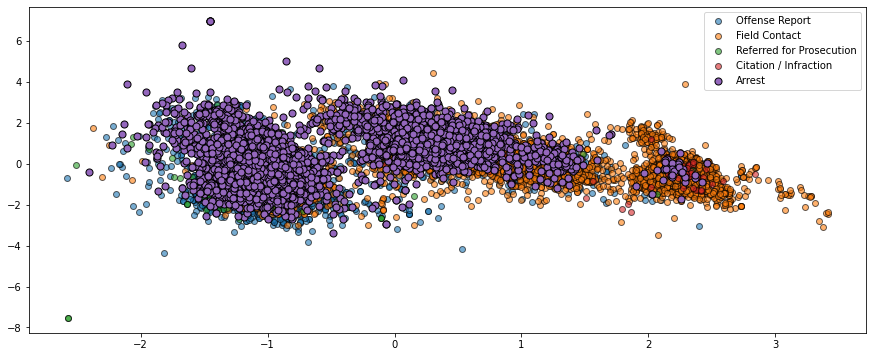

In [45]:
from src.visualize import plot_lda_clusters

top_category = 'Arrest'

plot_lda_clusters(X_train_lda, target_encoder, category=top_category)

The clusters generated by LDA are interesting! 

In [23]:
from sklearn.mixture import GaussianMixture

cluster = GaussianMixture(n_components=3, means_init=[[-1.25, -1 ],
                                                      [1,1],
                                                      [2.25, -1]],
                         random_state=2021)

cluster.fit(X_train_lda.iloc[:,:2])
preds = cluster.predict(X_train_lda.iloc[:,:2])
X_train_lda['mixture'] = preds

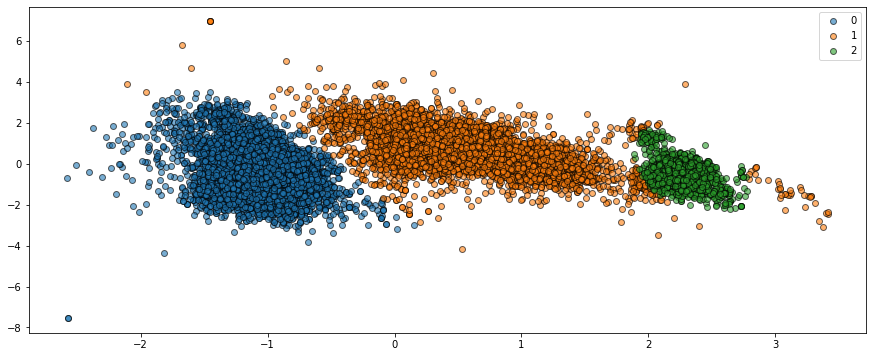

In [24]:
plt.figure(figsize=(15,6))

for label in X_train_lda.mixture.unique():
    frame = X_train_lda.query(f'mixture=={label}')
    plt.scatter(frame.C1, frame.C2, label=label, 
                edgecolor='black', alpha=.6)
    
plt.legend(loc='upper right');

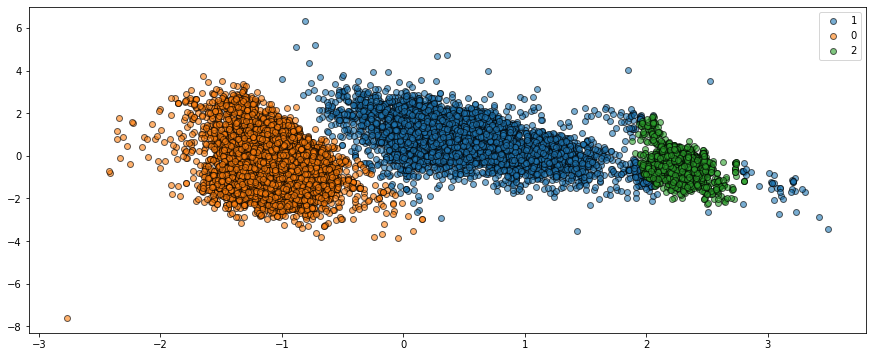

In [27]:
X_test_lda = mixture_preprocess.transform(X_test)
y_test_clusters = cluster.predict(X_test_lda)

X_test_lda = pd.DataFrame(X_test_lda, columns = ['C1', 'C2'])
X_test_lda['mixture'] = y_test_clusters
X_test_lda['label'] = y_test

plt.figure(figsize=(15,6))

for label in X_test_lda.mixture.unique():
    frame = X_test_lda.query(f'mixture=={label}')
    plt.scatter(frame.C1, frame.C2, label=label, 
                edgecolor='black', alpha=.6)
    
plt.legend(loc='upper right');